# Stock prices prediction

In this notebook, we'll compare different methods to predict stock prices. Methods for time series forecasting are not only used in finance, they are everywhere. Check this excellent [video](https://www.youtube.com/watch?v=JntA9XaTebs&t=2s) for examples of applications.

The aim is to study two approaches:

* statistical 
* machine learning 

Data are from Quandl API, a financial data provider.

In [18]:
# iconic trio for data science
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from config import get_quandl_api_key

%matplotlib inline

# python module for quandl, a financial data provider
import quandl

plt.rcParams['figure.figsize'] = [30,15]
plt.rcParams['font.size'] = 22

In [2]:
# set up a client to the Quandl API
quandl_api_key = get_quandl_api_key()
quandl.ApiConfig.api_key = quandl_api_key
quandl_code = "EOD/NKE" # code for the Nike Inc. (New York Stock Exchange)

# get the data 
nike_data = quandl.get(quandl_code)

In [6]:
nike_data.head()

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
Date,,,,,,,,,,,,
1980-12-02,11.50,11.75,11.50,11.50,786800.0,0.0,1.0,0.060487,0.061802,0.060487,0.060487,100710400.0
1980-12-03,11.38,11.38,11.25,11.25,196700.0,0.0,1.0,0.059856,0.059856,0.059172,0.059172,25177600.0
1980-12-04,11.62,11.75,11.62,11.62,177300.0,0.0,1.0,0.061118,0.061802,0.061118,0.061118,22694400.0
1980-12-05,11.25,11.25,11.00,11.00,59300.0,0.0,1.0,0.059172,0.059172,0.057857,0.057857,7590400.0
1980-12-08,10.50,10.50,10.38,10.38,42300.0,0.0,1.0,0.055227,0.055227,0.054596,0.054596,5414400.0


More info on the data we use right [here](https://www.quandl.com/data/EOD/NKE-Nike-Inc-NKE-Stock-Prices-Dividends-and-Splits). For our purpose, we are going to only use the 'Close' column since it is heavily correlated with other columns and we have to choose one among them.
We are lucky to have more than 30 years of historical data of good quality.

In [7]:
stock_price = nike_data['Close']
stock_price.describe()

count    9620.000000
mean       55.669589
std        27.152826
min         6.870000
25%        39.587500
50%        56.500000
75%        74.752500
max       134.330000
Name: Close, dtype: float64

So we have more than 9620 data points. On average the stock price is about 55 dollars.

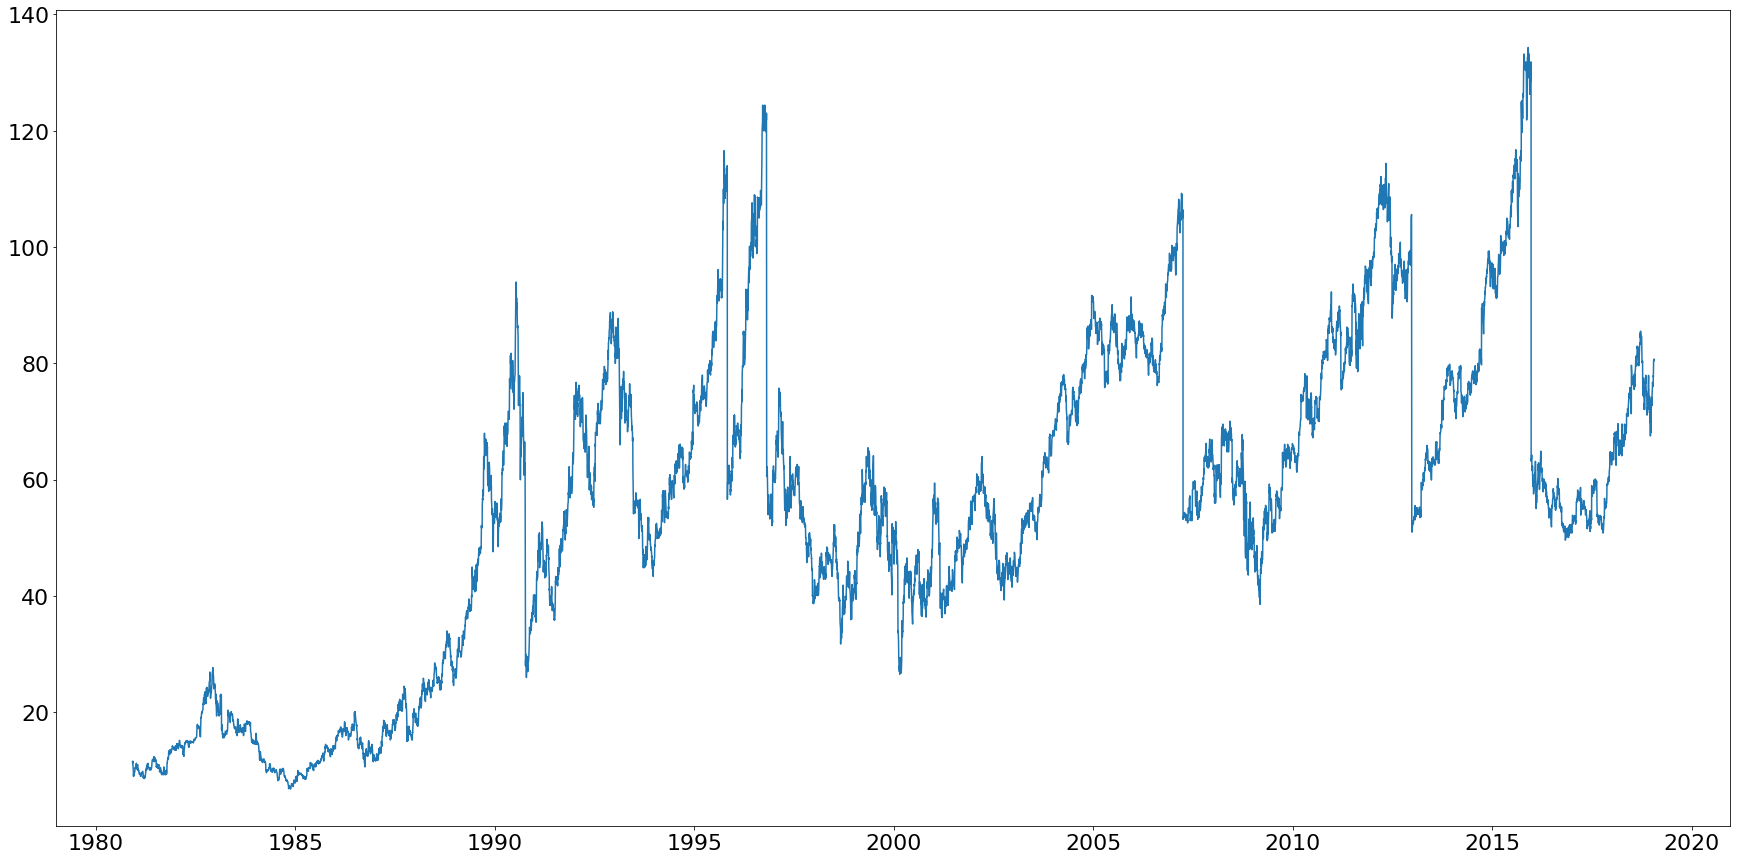

In [21]:
sns.lineplot(data = stock_price, markers = True)